In [225]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

LeBron = pd.read_csv('lebron_career.csv')
Jordan = pd.read_csv('jordan_career.csv')


In [226]:
Jordan = Jordan.drop(["game", "date", "team","minus_plus","game_score", "age"], axis = 1)
LeBron = LeBron.drop(["game", "date", "team","minus_plus","game_score", "age"], axis = 1)

In [227]:
Jordan_means = Jordan[["pts","ast","trb","blk","stl"]].mean()
LeBron_means = LeBron[["pts","ast","trb","blk","stl"]].mean()
df1 = pd.DataFrame(LeBron_means.transpose())
df2 = pd.DataFrame(Jordan_means.transpose())

combined_means = {"Jordan": Jordan_means, "LeBron" : LeBron_means}
mean_df = pd.DataFrame(combined_means)
mean_df.index.name = 'Averages'
mean_df = mean_df.transpose()

In [228]:
mean_df["Athletes"] = ["Jordan", "LeBron"]
mean_df

Averages,pts,ast,trb,blk,stl,Athletes
Jordan,30.123134,5.254664,6.223881,0.833022,2.345149,Jordan
LeBron,27.148410,7.163428,7.349823,0.782686,1.640459,LeBron


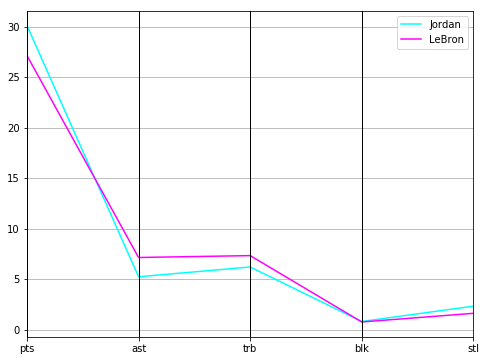

In [229]:
mpl.pyplot.figure(figsize=(8,6))

par = pd.plotting.parallel_coordinates(mean_df.iloc[:2], "Athletes", colormap=mpl.pyplot.cm.cool)


3.4637809187279154